### Să se genereze variabila normală N (2.5, 5) cu ajutorul limitei centrale și cu ajutorul metodei polare. Să se genereze variabila geometrică prin două metode. 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### Generarea variabilei normale, folosind Teorema Limitei Centrale (CLT)

In [64]:
def limita_centrala(n_samples, expected_value, variance, n_uniform):
    abatere_standard = np.sqrt(variance) 

    distributie_uniforma = np.random.uniform(0, 1, size=(n_samples, n_uniform))
    distributie_normala = np.sum(distributie_uniforma, axis=1) - n_uniform / 2                                   # centralizarea distributiei

    distributie_normala = distributie_normala * abatere_standard * np.sqrt(12 / n_uniform) + expected_value      # scalarea distributiei

    return distributie_normala


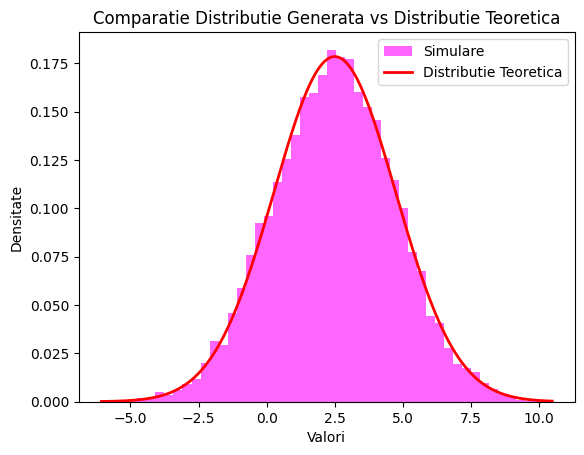

In [65]:
# apelarea functiei limita_centrala
lc = limita_centrala(10000, 2.5, 5, 20)

# histograma pentru distributia generata si distributia teoretica
plt.hist(lc, bins=50, density=True, alpha=0.6, color='fuchsia', label='Simulare')

# distributia teoretica realiza cu scipy
x = np.linspace(min(lc), max(lc), 1000)
y = norm.pdf(x, loc=2.5, scale=np.sqrt(5))
plt.plot(x, y, 'r-', lw=2, label='Distributie Teoretica')

plt.title('Comparatie Distributie Generata vs Distributie Teoretica')
plt.xlabel('Valori')
plt.ylabel('Densitate')
plt.legend()
plt.show()


In [77]:
# metoda polara
def metoda_polara(n_samples, expected_value, variance):
    abatere_standard = np.sqrt(variance)
    samples = []  # lista in care se vor salva valorile generate

    while len(samples) < n_samples:
        # generarea lui u1 si u2 uniforme in (-1, 1)
        u1 = np.random.uniform(-1, 1)
        u2 = np.random.uniform(-1, 1)

        # calculam s
        s = u1**2 + u2**2

        # daca s < 1, realizam transformarea box-muller, altfel repetam pasii
        if 0 < s < 1:
            mul = np.sqrt(-2 * np.log(s) / s)
            x1 = u1 * mul
            x2 = u2 * mul

            samples.append(x1 * abatere_standard + expected_value)

            # daca nu am generat suficiente valori, adaugam si x2 in lista
            if len(samples) < n_samples:
                samples.append(x2 * abatere_standard + expected_value)

    return np.array(samples[:n_samples])


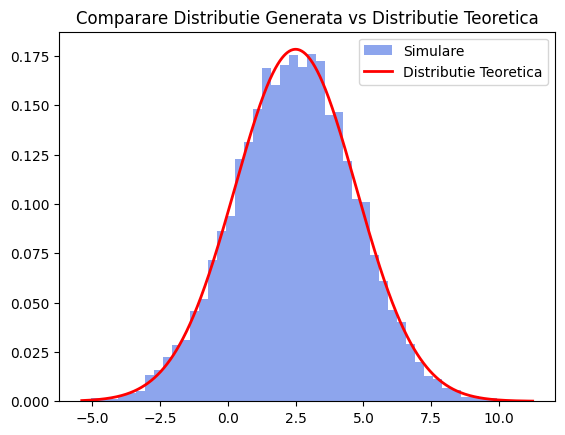

In [82]:
# apelarea functiei metoda_polara
mp = metoda_polara(10000, 2.5, 5)

# histograma pentru distributia generata si distributia teoretica
x = np.linspace(min(mp), max(mp), 1000)
y = norm.pdf(x, loc=2.5, scale=np.sqrt(5))
plt.hist(mp, bins=50, density=True, alpha=0.6, color='royalblue', label='Simulare')
plt.plot(x, y, 'r-', lw=2, label='Distributie Teoretica')
plt.title('Comparare Distributie Generata vs Distributie Teoretica')
plt.legend()
plt.show()

In [7]:
# generarea variabilei geometrice - distributie exponentiala


In [9]:
# generarea variabilei geometrice - metoda de simulare directa
